In [2]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers 
pio.renderers.default = 'jupyterlab'
import plotly.express as px
from plotly.offline import plot,iplot,init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objects as go

Gas_Price = pd.read_csv("2004-2019.tsv", sep='\t')

In [3]:
#Dropping columns that I won't use
Gas_Price.drop(columns={"Unnamed: 0", "DATA INICIAL", "DESVIO PADRÃO REVENDA", "MARGEM MÉDIA REVENDA", 
                        "COEF DE VARIAÇÃO REVENDA", "DESVIO PADRÃO DISTRIBUIÇÃO", "COEF DE VARIAÇÃO DISTRIBUIÇÃO"},
                        inplace = True)

In [4]:
# Changing the columns to lowercase
Gas_Price.columns=["Data Final", "Região", "Estado", "Produto", "Número de Postos Pesquisados", "Unidade de Medida",
                   "Preço Médio Revenda", "Preço Mínimo Revenda", "Preço Máximo Revenda", "Preço Médio Distribuição",
                   "Preço Mínimo Distribuição", "Preço Máximo Distribuição", "Mês", "Ano"]

In [5]:
#Convert the datetime column to datetime object
Gas_Price["Data Final"] = pd.to_datetime(Gas_Price['Data Final'])

#Creating a new column which will be the merge of the columns: Month and Year
ano_mes = Gas_Price.Ano.astype(str)+ "-" + Gas_Price.Mês.astype(str)
Gas_Price["Ano_Mes"] = pd.to_datetime(ano_mes)

## Dropping the columns: Month and Year
#Gas_Price.drop(columns={"Mês", "Ano"}, inplace=True)


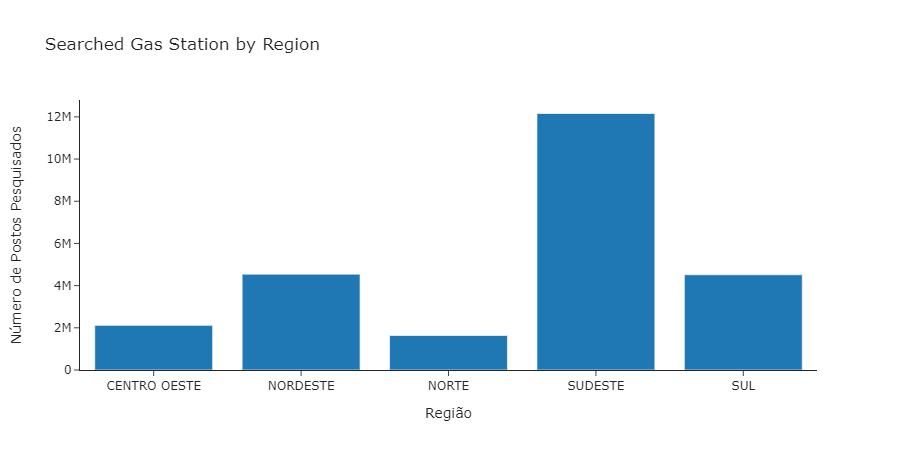

In [6]:
Gas_Price_Postos = Gas_Price.groupby(["Região"])["Número de Postos Pesquisados"].sum()
df_Gas_Price_Postos = pd.DataFrame(Gas_Price_Postos)
df_Gas_Price_Postos = df_Gas_Price_Postos.reset_index()

fig = px.bar(df_Gas_Price_Postos,
             x="Região",
             y="Número de Postos Pesquisados",
             template="simple_white",
             title="Searched Gas Station by Region")
fig

## We have much more searched Gas Station in Southeast, followed by Northeast and South

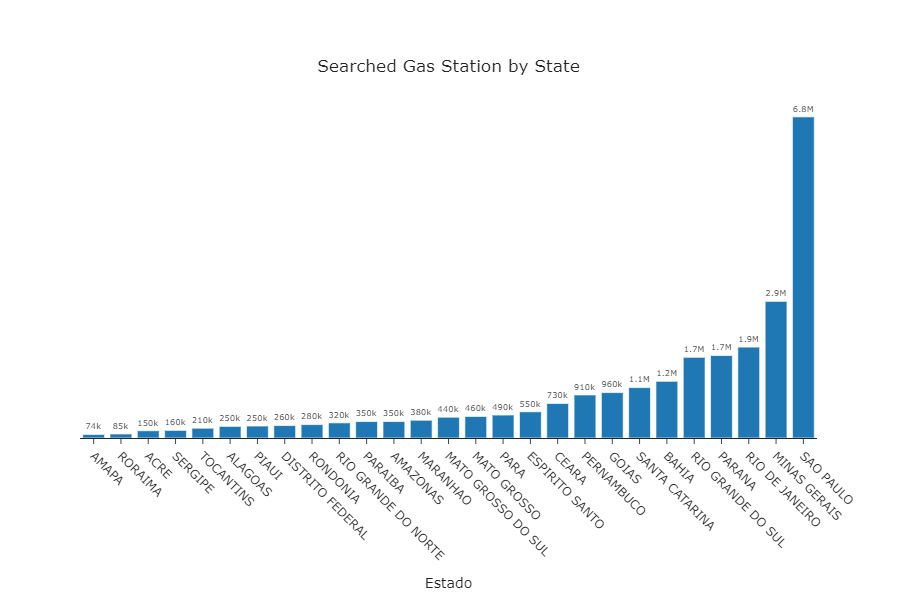

In [7]:
Gas_Price_Postos_Estados = Gas_Price.groupby(["Estado"])["Número de Postos Pesquisados"].sum()
df_Gas_Price_Postos_Estados = pd.DataFrame(Gas_Price_Postos_Estados)
df_Gas_Price_Postos_Estados = df_Gas_Price_Postos_Estados.reset_index().sort_values(by="Número de Postos Pesquisados", ascending = True)

fig = px.bar(df_Gas_Price_Postos_Estados,
             x="Estado",
             y="Número de Postos Pesquisados",
             template = "simple_white",
             title="Searched Gas Station by State",
             text="Número de Postos Pesquisados" )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8,  uniformtext_mode='hide')

fig.update_yaxes(visible=False, showticklabels=False) ##removing the yaxes

fig.update_layout(                                    # Editing the layout
    title={                                           # Editing the title
        'text': "Searched Gas Station by State",      # Changing the Title
        'y':0.9,                                      # Y position for the title
        'x':0.5},                                     # X position for the title
    
    height=600,                                       # reshaping the yaxis height.
    xaxis_tickangle = 45)                             # rotating the xticks 45 degreess

fig

## The TOP3 states are no surprise. We have 3 of 4 States that are from the Southeast region. But the next 2 states are curious these states are from the South Region which has only 3 states, the other State is Santa Catarina the 7th State in ourchart. 
## Although we have the South Region in the Top 10 of this chart. We can see by the previous chart that this region is only the 3rd by Searched Gas Station, which means that Northeast has the 2nd position because it has more States

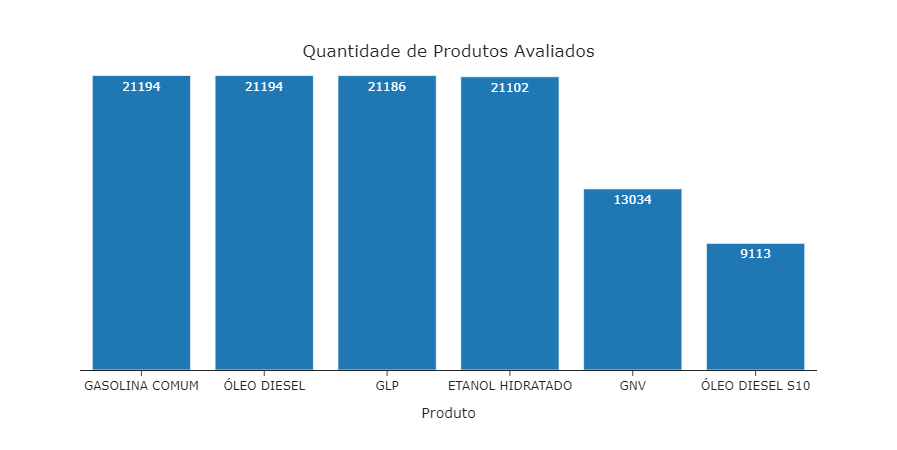

In [8]:
## Checking the Products evaluated

Gas_Price_Produto = Gas_Price["Produto"].value_counts()
df_Gas_Price_Produto = pd.DataFrame(Gas_Price_Produto).reset_index()
df_Gas_Price_Produto.rename(columns={"index":"Produto","Produto":"Contagem"}, inplace = True)

fig = px.bar(df_Gas_Price_Produto,
             x="Produto",
             y="Contagem",
             template="simple_white",
             text="Contagem") ## Adding the numbers in the bars

fig.update_yaxes(visible=False, showticklabels=False) ##removing the yaxes
fig.update_layout( ##Editing the title
    title={
        'text': "Quantidade de Produtos Avaliados", #Changing the Title
        'y':0.9, ## Y position for the title
        'x':0.5})## X position for the title

fig

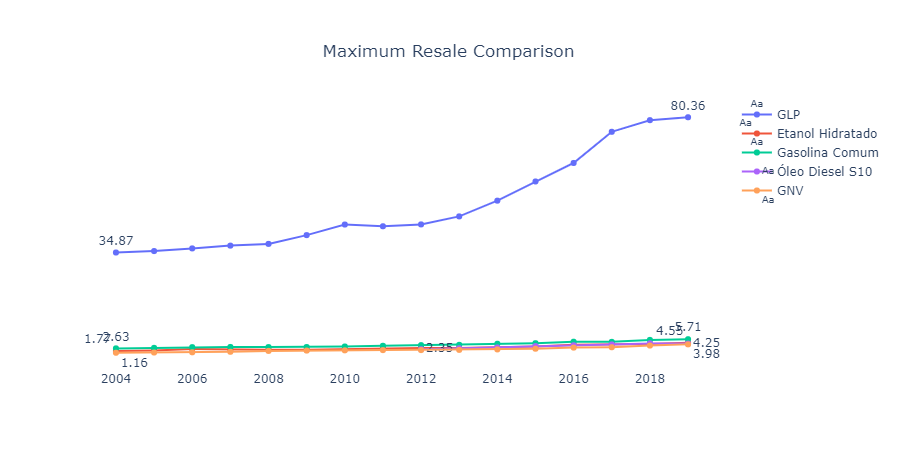

In [12]:
## Checking the Maximum Price Variation for Rio de Janeiro

Gas_Price_Max = Gas_Price.groupby(["Ano", "Produto", "Estado" ])["Preço Máximo Revenda"].mean().round(2) # Groupby Year, Product and State. Shows the Maximum Resale Price by the mean 
df_Gas_Price_Max = pd.DataFrame(Gas_Price_Max).reset_index()   # Reseting index
df_Gas_Price_Max_RJ = df_Gas_Price_Max[df_Gas_Price_Max["Estado"]=="RIO DE JANEIRO"] # Show the data only when the State = Rio de Janeiro
df_Gas_Price_Max_RJ_GLP = df_Gas_Price_Max_RJ[df_Gas_Price_Max_RJ["Produto"]=="GLP"] # Show the data only when product = GLP

fig = go.Figure() # Creating the Figure

fig.add_trace(go.Scatter(                                         # Adding the line for the GLP product
              x=df_Gas_Price_Max_RJ_GLP['Ano'],                   # Adding to xaxis the Year 
              y=df_Gas_Price_Max_RJ_GLP["Preço Máximo Revenda"],  # Adding to yaxis the Maximum Resale Price
              mode="lines+markers+text",                          # Here I'm saying that this line must have a full line connecting the dots, markers for each value, and text for the values
              name="GLP",                                         # Setting the name that must appear in the legend.
              text=[34.87, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 80.36], # Showing only the values that I want to show. In this case the first and last values. 
                                                                                                                       # The number of itens in this list are equal to the years in the xaxis. 
              textposition="top center" # In which position I want to show the values.
              ))

# For the next Traces it all goes the same as above. Changing only the product that I'm showing

df_Gas_Price_Max_RJ_EtanolH = df_Gas_Price_Max_RJ[df_Gas_Price_Max_RJ["Produto"]=="ETANOL HIDRATADO"]
fig.add_trace(go.Scatter(
              x=df_Gas_Price_Max_RJ_EtanolH['Ano'],
              y=df_Gas_Price_Max_RJ_EtanolH["Preço Máximo Revenda"],
              mode="lines+markers+text",
              name="Etanol Hidratado",
              text=[1.77, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 4.55],
              textposition="top left"
              ))

df_Gas_Price_Max_RJ_GasolinaC = df_Gas_Price_Max_RJ[df_Gas_Price_Max_RJ["Produto"]=="GASOLINA COMUM"]
fig.add_trace(go.Scatter(
              x=df_Gas_Price_Max_RJ_GasolinaC['Ano'],
              y=df_Gas_Price_Max_RJ_GasolinaC["Preço Máximo Revenda"],
              mode="lines+markers+text",
              name="Gasolina Comum",
              text=[2.63, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 5.71],
              textposition="top center"
              ))

df_Gas_Price_Max_RJ_OleoS10 = df_Gas_Price_Max_RJ[df_Gas_Price_Max_RJ["Produto"]=="ÓLEO DIESEL S10"]
fig.add_trace(go.Scatter(
              x=df_Gas_Price_Max_RJ_OleoS10['Ano'],
              y=df_Gas_Price_Max_RJ_OleoS10["Preço Máximo Revenda"],
              mode="lines+markers+text",
              name="Óleo Diesel S10",
              text=[2.35, None, None, None, None, None, None, 4.25],
              textposition="middle right"
              ))

df_Gas_Price_Max_RJ_GNV = df_Gas_Price_Max_RJ[df_Gas_Price_Max_RJ["Produto"]=="GNV"]
fig.add_trace(go.Scatter(
              x=df_Gas_Price_Max_RJ_GNV['Ano'],
              y=df_Gas_Price_Max_RJ_GNV['Preço Máximo Revenda'],
              mode="lines+markers+text",
              name="GNV",
              text=[1.16, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 3.98],
              textposition="bottom right"
              ))

fig.update_layout(                           # Here I'm upgrading the graph layout
    xaxis=dict
    (
          showgrid=False,                    # Removing grid for xaxis
          showticklabels=True                # Removing the ticks for xaxis
    ),
    yaxis=dict
    (
          showgrid=False,                    # Removing grid for y axis
          showticklabels=False               # Removing tick for yaxis
    ),
    plot_bgcolor='white',                    # Changing the background color to white.
     title={
        'text': "Maximum Resale Comparison", # Changing the Title
        'y':0.9,                             # Y position for the title
        'x':0.5})                            # X position for the title




fig


## As we can see the Price always goes high, with the GNV as the cheapest and GLP the most expensive. In 2010 we had the Gulf of Mexico accident and this may have increased the price over the years, among other factors.

In [ ]:
#Let's compare how much profit there was with reselling the products. For this we'll use the mean value. 

df_Gas_Price_Reselling = Gas_Price[["Estado","Produto","Preço Médio Revenda", "Preço Médio Distribuição","Ano"]]
df_Gas_Price_Reselling["Preço Médio Distribuição"] = pd.to_numeric(df_Gas_Price_Reselling["Preço Médio Distribuição"], errors='coerce')
df_Gas_Price_Reselling.rename(columns={"Preço Médio Distribuição":"Preço_Médio_Distribuição"}, inplace = True)

df_Gas_Price_Reselling = df_Gas_Price_Reselling[df_Gas_Price_Reselling.Preço_Médio_Distribuição != "-"]
df_Gas_Price_Reselling["Lucro"] = ((df_Gas_Price_Reselling["Preço Médio Revenda"] - df_Gas_Price_Reselling["Preço_Médio_Distribuição"])/df_Gas_Price_Reselling["Preço_Médio_Distribuição"]).round(3)

df_Gas_Price_Reselling_group = df_Gas_Price_Reselling.groupby(["Ano","Estado","Produto"])["Lucro"].mean().round(3)
df_Gas_Price_Reselling_group = pd.DataFrame(df_Gas_Price_Reselling_group).reset_index()

df_Gas_Price_Reselling_RJ = df_Gas_Price_Reselling_group[df_Gas_Price_Reselling_group["Estado"]=="RIO DE JANEIRO"] # Show the data only when the State = Rio de Janeiro
df_Gas_Price_Reselling_RJ_GLP = df_Gas_Price_Reselling_RJ[df_Gas_Price_Reselling_RJ["Produto"]=="GLP"] # Show the data only when product = GLP

fig = go.Figure()                                                       # Creating the Figure

fig.add_trace(go.Scatter(                                               # Adding the line for the GLP product
              x=df_Gas_Price_Reselling_RJ_GLP['Ano'],                   # Adding to xaxis the Year 
              y=df_Gas_Price_Reselling_RJ_GLP["Lucro"],                 # Adding to yaxis the Maximum Resale Price
              mode="lines+markers+text",                                # Here I'm saying that this line must have a full line connecting the dots, markers for each value, and text for the values
              name="GLP",                                               # Setting the name that must appear in the legend.
              text=[0.197, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0.357], # Showing only the values that I want to show. In this case the first and last values. 
                                                                                                                       # The number of itens in this list are equal to the years in the xaxis. 
              textposition=["middle left",] # In which position I want to show the values.
              ))

# For the next Traces it all goes the same as above. Changing only the product that I'm showing

df_Gas_Price_Reselling_RJ_EtanolH = df_Gas_Price_Reselling_RJ[df_Gas_Price_Reselling_RJ["Produto"]=="ETANOL HIDRATADO"]
fig.add_trace(go.Scatter(
              x=df_Gas_Price_Reselling_RJ_EtanolH['Ano'],
              y=df_Gas_Price_Reselling_RJ_EtanolH["Lucro"],
              mode="lines+markers+text",
              name="Etanol Hidratado",
              text=[0.215, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0.147],
              textposition="top left"
              ))

df_Gas_Price_Reselling_RJ_GasolinaC = df_Gas_Price_Reselling_RJ[df_Gas_Price_Reselling_RJ["Produto"]=="GASOLINA COMUM"]
fig.add_trace(go.Scatter(
              x=df_Gas_Price_Reselling_RJ_GasolinaC['Ano'],
              y=df_Gas_Price_Reselling_RJ_GasolinaC["Lucro"],
              mode="lines+markers+text",
              name="Gasolina Comum",
              text=[0.126, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0.121],
              textposition="top center"
              ))

df_Gas_Price_Reselling_RJ_OleoS10 = df_Gas_Price_Reselling_RJ[df_Gas_Price_Reselling_RJ["Produto"]=="ÓLEO DIESEL S10"]
fig.add_trace(go.Scatter(
              x=df_Gas_Price_Reselling_RJ_OleoS10['Ano'],
              y=df_Gas_Price_Reselling_RJ_OleoS10["Lucro"],
              mode="lines+markers+text",
              name="Óleo Diesel S10",
              text=[None, 0.143, None, None, None, None, None, 0.148],
              textposition="middle right"
              ))

df_Gas_Price_Reselling_RJ_GNV = df_Gas_Price_Reselling_RJ[df_Gas_Price_Reselling_RJ["Produto"]=="GNV"]
fig.add_trace(go.Scatter(
              x=df_Gas_Price_Reselling_RJ_GNV['Ano'],
              y=df_Gas_Price_Reselling_RJ_GNV['Lucro'],
              mode="lines+markers+text",
              name="GNV",
              text=[0.736, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0.291],
              textposition="top center"
              ))

fig.update_layout(                           # Here I'm upgrading the graph layout
    xaxis=dict
    (
          showgrid=False,                    # Removing grid for xaxis
          showticklabels=True                # Removing the ticks for xaxis
    ),
    yaxis=dict
    (
          showgrid=False,                    # Removing grid for y axis
          showticklabels=False               # Removing tick for yaxis
    ),
    plot_bgcolor='white',                    # Changing the background color to white.
     title={
        'text': "Maximum Lucro Comparison", # Changing the Title
        'y':0.9,                             # Y position for the title
        'x':0.5})                            # X position for the title



fig


In [ ]:
df_Gas_Price_Reselling_RJ_GNV